# Introduction to Data Science: Data Cleaning

In [8]:
import json
import requests
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)

## Functions

In [9]:
def grab_json(req, key=False):
    """
    Grab info specified in `spec.json`.
    
    req: str
    Returns: dict
    """
    api = "https://api.opendota.com/api"
    req = api + req
    payload = {}
    if key:
        with open("api_key.txt") as f:
            key = f.read()
        payload['api_key'] = key
        
    r = requests.get(req, params=payload)
    return r.json()

## Organize Player Data

In [10]:
player = pd.DataFrame(grab_json("/players/37244929/recentMatches"))
player.columns

Index(['match_id', 'player_slot', 'radiant_win', 'duration', 'game_mode',
       'lobby_type', 'hero_id', 'start_time', 'version', 'kills', 'deaths',
       'assists', 'skill', 'xp_per_min', 'gold_per_min', 'hero_damage',
       'tower_damage', 'hero_healing', 'last_hits', 'lane', 'lane_role',
       'is_roaming', 'cluster', 'leaver_status', 'party_size'],
      dtype='object')

In [11]:
player = player[["hero_id", "kills", "deaths", "assists", "skill", "xp_per_min", "gold_per_min", "hero_damage",
        "tower_damage", "hero_healing", "last_hits", "lane", "lane_role", "duration"]]

player.head()

,hero_id,kills,deaths,assists,skill,xp_per_min,gold_per_min,hero_damage,tower_damage,hero_healing,last_hits,lane,lane_role,duration
0,111,1,7,9,1.0,208,153,3913,68,8797,6,3.0,1.0,2033
1,111,4,6,14,2.0,375,251,5935,74,4007,24,1.0,1.0,2201
2,64,7,6,20,2.0,509,341,22915,1254,0,84,3.0,1.0,2982
3,111,3,8,22,NaN,515,278,9379,265,10056,28,5.0,4.0,2500
4,111,7,8,9,NaN,336,233,12975,161,15955,34,1.0,1.0,3201


In [12]:
# TODO: make gpm, kpm, lpm

## Organize Hero Data

In [13]:
heroes = pd.DataFrame(grab_json("/heroStats")).set_index("id", drop=True)
heroes = heroes[["localized_name", "primary_attr", "attack_type", "base_health", "base_health_regen", "base_mana",
        "base_mana_regen", "base_armor", "base_mr", "base_attack_min", "base_attack_max", "base_str",
        "base_agi", "base_int", "str_gain", "int_gain", "attack_range", "projectile_speed", "attack_rate",
        "move_speed", "turn_rate"]]

heroes.head()

,localized_name,primary_attr,attack_type,base_health,base_health_regen,base_mana,base_mana_regen,base_armor,base_mr,base_attack_min,...,base_str,base_agi,base_int,str_gain,int_gain,attack_range,projectile_speed,attack_rate,move_speed,turn_rate
id,,,,,,,,,,,,,,,,,,,,,
1,Anti-Mage,agi,Melee,200,0.25,75,0.0,-1.0,25,29,...,23,24,12,1.3,1.8,150,0,1.4,310,0.5
2,Axe,str,Melee,200,2.75,75,0.0,-1.0,25,27,...,25,20,18,3.6,1.6,150,900,1.7,310,0.6
3,Bane,int,Ranged,200,NaN,75,0.0,1.0,25,35,...,23,23,23,2.6,2.6,400,900,1.7,305,0.6
4,Bloodseeker,agi,Melee,200,NaN,75,0.0,2.0,25,33,...,24,22,18,2.7,1.7,150,900,1.7,300,0.5
5,Crystal Maiden,int,Ranged,200,NaN,75,1.0,-1.0,25,30,...,18,16,14,2.2,3.3,600,900,1.7,275,0.5


In [14]:
hero_ids = list(heroes.index)
stats = ['gold_per_min', 'xp_per_min', 'kills_per_min', 'last_hits_per_min', 'hero_damage_per_min', 'tower_damage']

hero_stats = []
for hero_id in hero_ids:
    hero = grab_json(f"/benchmarks/?hero_id={hero_id}", key=True)
    output = {}
    output["id"] = hero_id
    output["localized_name"] = heroes.loc[hero_id, "localized_name"]
    for stat in stats:
        output[stat] = hero['result'][stat][4]['value']
    hero_stats.append(output)

In [16]:
hero_stats[:3]

,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
id,,,,,,,
1,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721
2,Axe,406,559,0.185471,4.185137,532.148438,962
3,Bane,262,437,0.078560,0.758853,271.457801,350


In [15]:
hero_stats = pd.DataFrame(hero_stats).set_index("id", drop=True)

In [17]:
hero_stats

,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
id,,,,,,,
1,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721
2,Axe,406,559,0.185471,4.185137,532.148438,962
3,Bane,262,437,0.078560,0.758853,271.457801,350
4,Bloodseeker,490,641,0.227488,5.829545,631.144481,2797
5,Crystal Maiden,281,434,0.080754,1.357814,360.614224,299
6,Drow Ranger,494,617,0.190880,6.192893,588.543165,5347
7,Earthshaker,315,490,0.096899,2.207732,403.838384,465
8,Juggernaut,534,663,0.207809,7.174571,581.085044,4811
9,Mirana,331,494,0.120289,2.486884,374.505988,1015


## Basic Plotting + Clustering

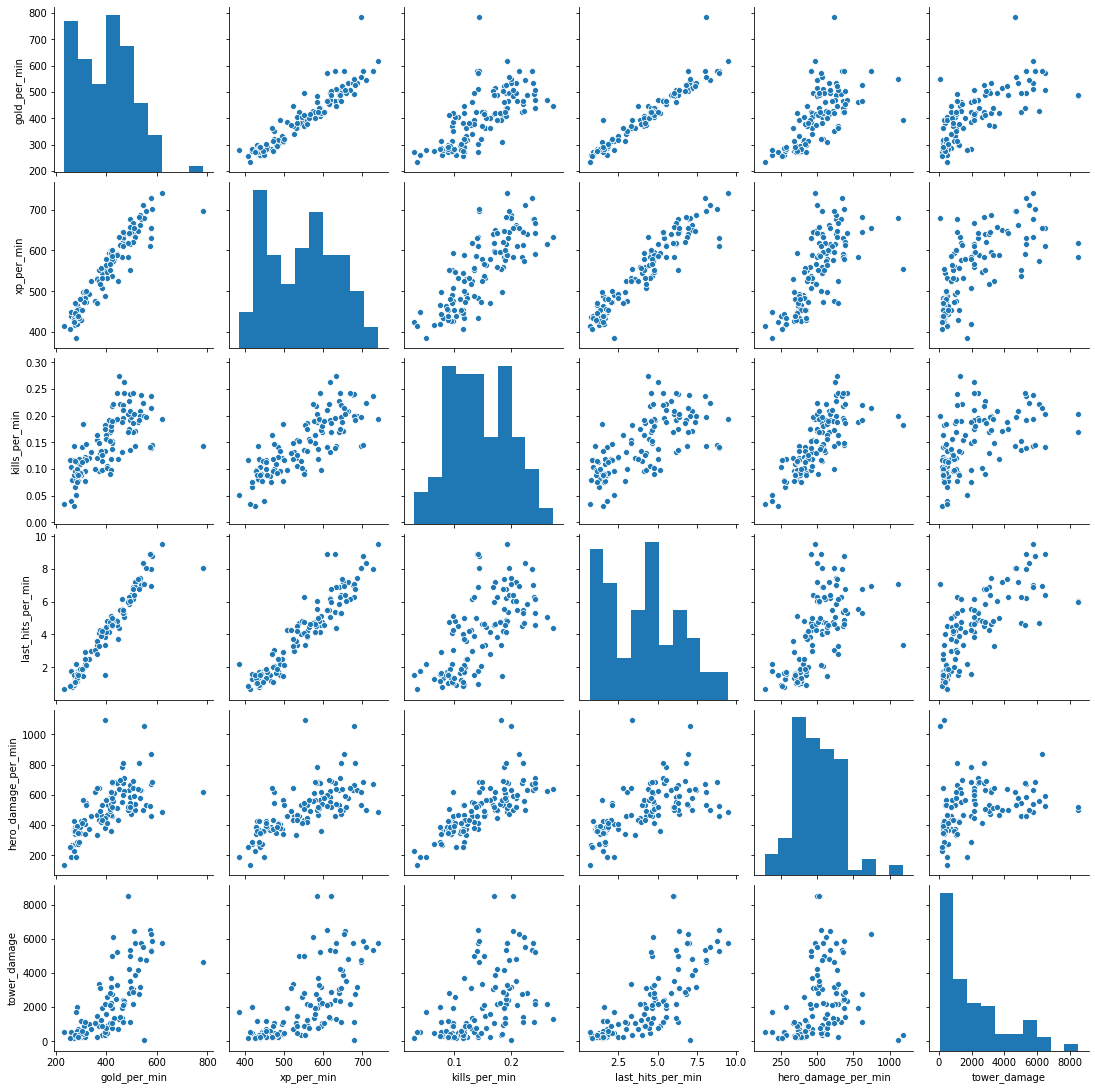

In [19]:
pairplot_data = hero_stats.drop("localized_name", axis=1)
sns.pairplot(pairplot_data)

## basic dimensionality reduction with PCA... poor results

In [68]:
hero_stats.head()

,Primary Attribute,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage,PCA_0,PCA_1
id,,,,,,,,,,
1,agi,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721,5140.101236,-74.521252
2,str,Axe,406,559,0.185471,4.185137,532.148438,962,-1596.934816,118.630448
3,int,Bane,262,437,0.078560,0.758853,271.457801,350,-2484.347819,-289.414017
4,agi,Bloodseeker,490,641,0.227488,5.829545,631.144481,2797,1005.997789,196.808086
5,int,Crystal Maiden,281,434,0.080754,1.357814,360.614224,299,-2551.910305,-166.264841


## Add hero type information

In [36]:
# hero_stats["primary_attr"] = heroes["primary_attr"]
hero_stats.insert(0, "Primary Attribute", heroes["primary_attr"])
hero_stats.head()

,Primary Attribute,primary_attr,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage,0,1
id,,,,,,,,,,,
1,agi,agi,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721,3634.600440,-52.694483
2,str,str,Axe,406,559,0.185471,4.185137,532.148438,962,-1129.203438,83.884394
3,int,int,Bane,262,437,0.078560,0.758853,271.457801,350,-1756.699190,-204.646614
4,agi,agi,Bloodseeker,490,641,0.227488,5.829545,631.144481,2797,711.347858,139.164332
5,int,int,Crystal Maiden,281,434,0.080754,1.357814,360.614224,299,-1804.473081,-117.566996


In [69]:
palette = ["green", "red", "blue"]  # for plotting based on primary attribute

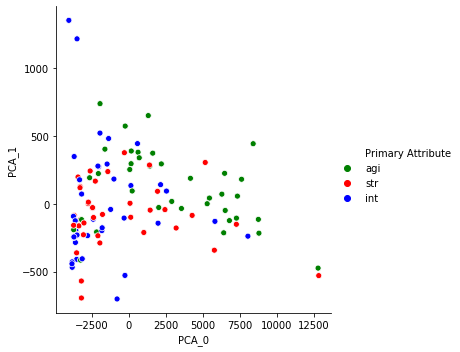

In [75]:
data = hero_stats.drop(["localized_name", "Primary Attribute"], axis=1).values
target_names = np.array(hero_stats["localized_name"])

pca = PCA(n_components=2)
X_r = pca.fit(data).transform(data)

hero_stats.loc[:, "PCA_0"] = X_r[:, 0]
hero_stats.loc[:, "PCA_1"] = X_r[:, 1]


pca1 = sns.relplot(x="PCA_0", y="PCA_1", hue="Primary Attribute", data=hero_stats, palette=palette)
# todo / to try: different clustering methods, normalize data first, 
# figure out a way to plot so that you can figure out which hero is which
# don't plot with a huge legend

### Pairplot with PCA features included

- Tower damage was almost completely linearly correlated with the first principal component
- Hero damage per minute had high linear correlation with the second

In [71]:
hero_stats.head()

,Primary Attribute,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage,PCA_0,PCA_1
id,,,,,,,,,,
1,agi,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721,6295.312627,-91.269521
2,str,Axe,406,559,0.185471,4.185137,532.148438,962,-1955.837726,145.292033
3,int,Bane,262,437,0.078560,0.758853,271.457801,350,-3042.692250,-354.458333
4,agi,Bloodseeker,490,641,0.227488,5.829545,631.144481,2797,1232.090632,241.039694
5,int,Crystal Maiden,281,434,0.080754,1.357814,360.614224,299,-3125.439058,-203.632011


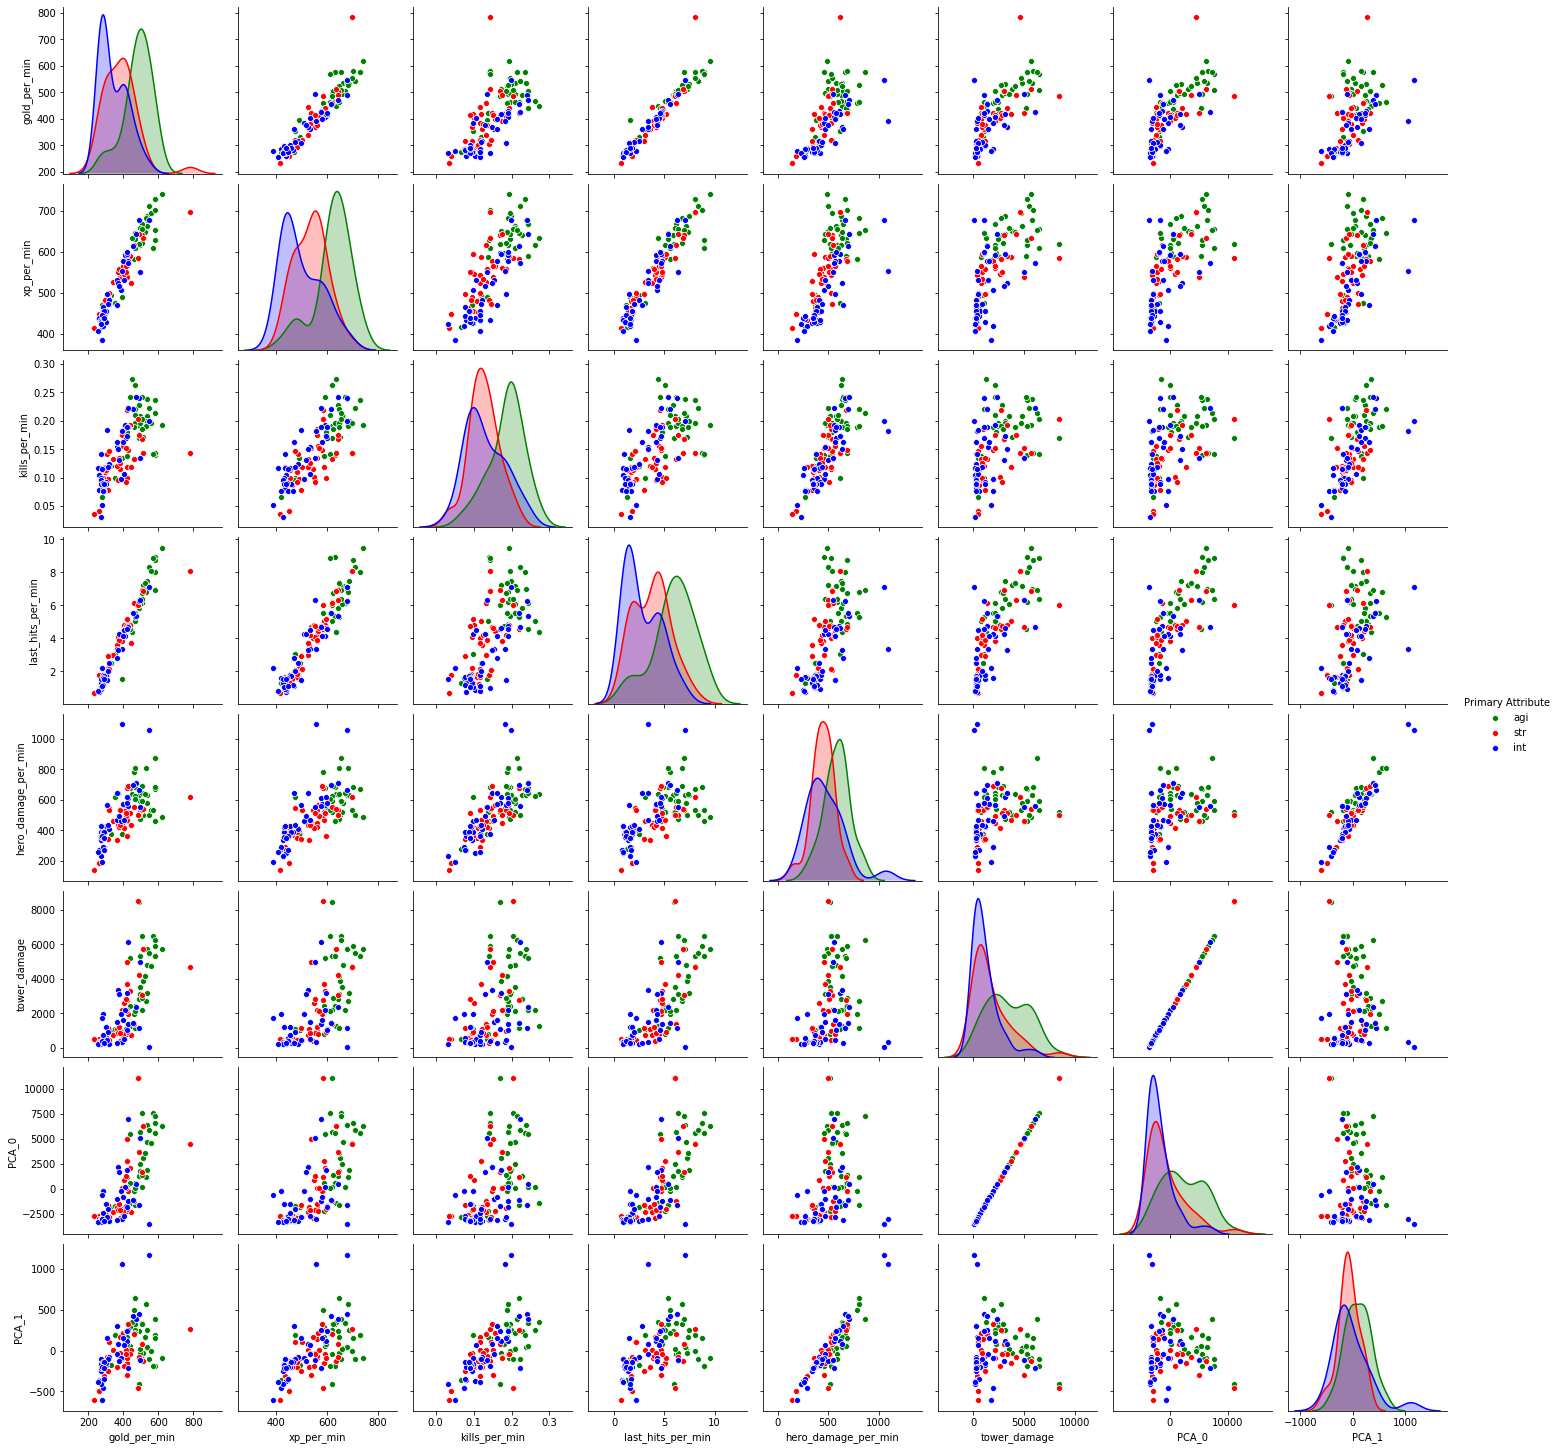

In [72]:
pairplot_data = hero_stats.drop("localized_name", axis=1)
sns.pairplot(pairplot_data, hue="Primary Attribute", 
             palette=["green", "red", "blue"])

## Need to do some preprocessing

In [73]:
hero_stats.head()

,Primary Attribute,localized_name,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage,PCA_0,PCA_1
id,,,,,,,,,,
1,agi,Anti-Mage,618,741,0.193315,9.494949,488.074150,5721,6295.312627,-91.269521
2,str,Axe,406,559,0.185471,4.185137,532.148438,962,-1955.837726,145.292033
3,int,Bane,262,437,0.078560,0.758853,271.457801,350,-3042.692250,-354.458333
4,agi,Bloodseeker,490,641,0.227488,5.829545,631.144481,2797,1232.090632,241.039694
5,int,Crystal Maiden,281,434,0.080754,1.357814,360.614224,299,-3125.439058,-203.632011


#### Scale data to unit mean and variance

In [74]:
from sklearn import preprocessing

data = hero_stats.drop(["Primary Attribute", "localized_name", "PCA_0", "PCA_1"], axis=1)
scaled = pd.DataFrame(preprocessing.scale(data), columns=data.columns)
scaled.head()

,gold_per_min,xp_per_min,kills_per_min,last_hits_per_min,hero_damage_per_min,tower_damage
0,2.122276,2.169180,0.859111,2.361482,-0.090589,1.813259
1,0.052187,0.100210,0.711566,0.032801,0.186638,-0.566107
2,-1.353911,-1.286682,-1.299649,-1.469836,-1.453109,-0.872089
3,0.872411,1.032383,1.501983,0.753976,0.809325,0.351341
4,-1.168384,-1.320786,-1.258376,-1.207155,-0.892314,-0.897588


### Looks like slightly better clustering after normalization

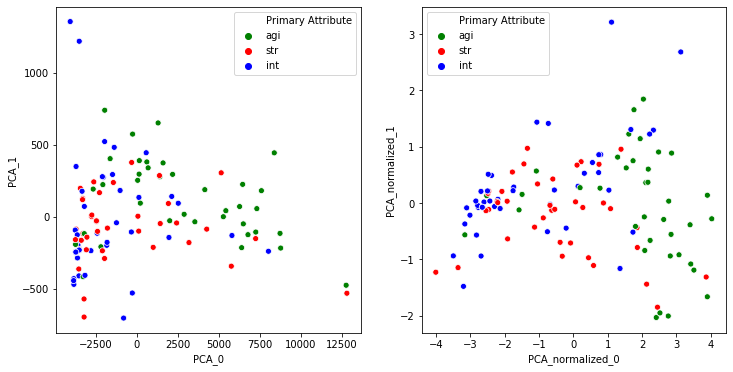

In [83]:
pca = PCA(n_components=2)
X_r = pca.fit(scaled).transform(scaled)
hero_stats.loc[:, "PCA_normalized_0"] = X_r[:, 0]
hero_stats.loc[:, "PCA_normalized_1"] = X_r[:, 1]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))

sns.scatterplot(x="PCA_0", y="PCA_1", hue="Primary Attribute", data=hero_stats, palette=palette, ax=axes[0])
sns.scatterplot(x="PCA_normalized_0", y="PCA_normalized_1", hue="Primary Attribute", data=hero_stats, palette=palette, ax=axes[1])


### Post-normalization pairplot
- before normalization, feature importance was disproportionately on tower damage and hero damage per minute
- after normalization, feature importance was more even

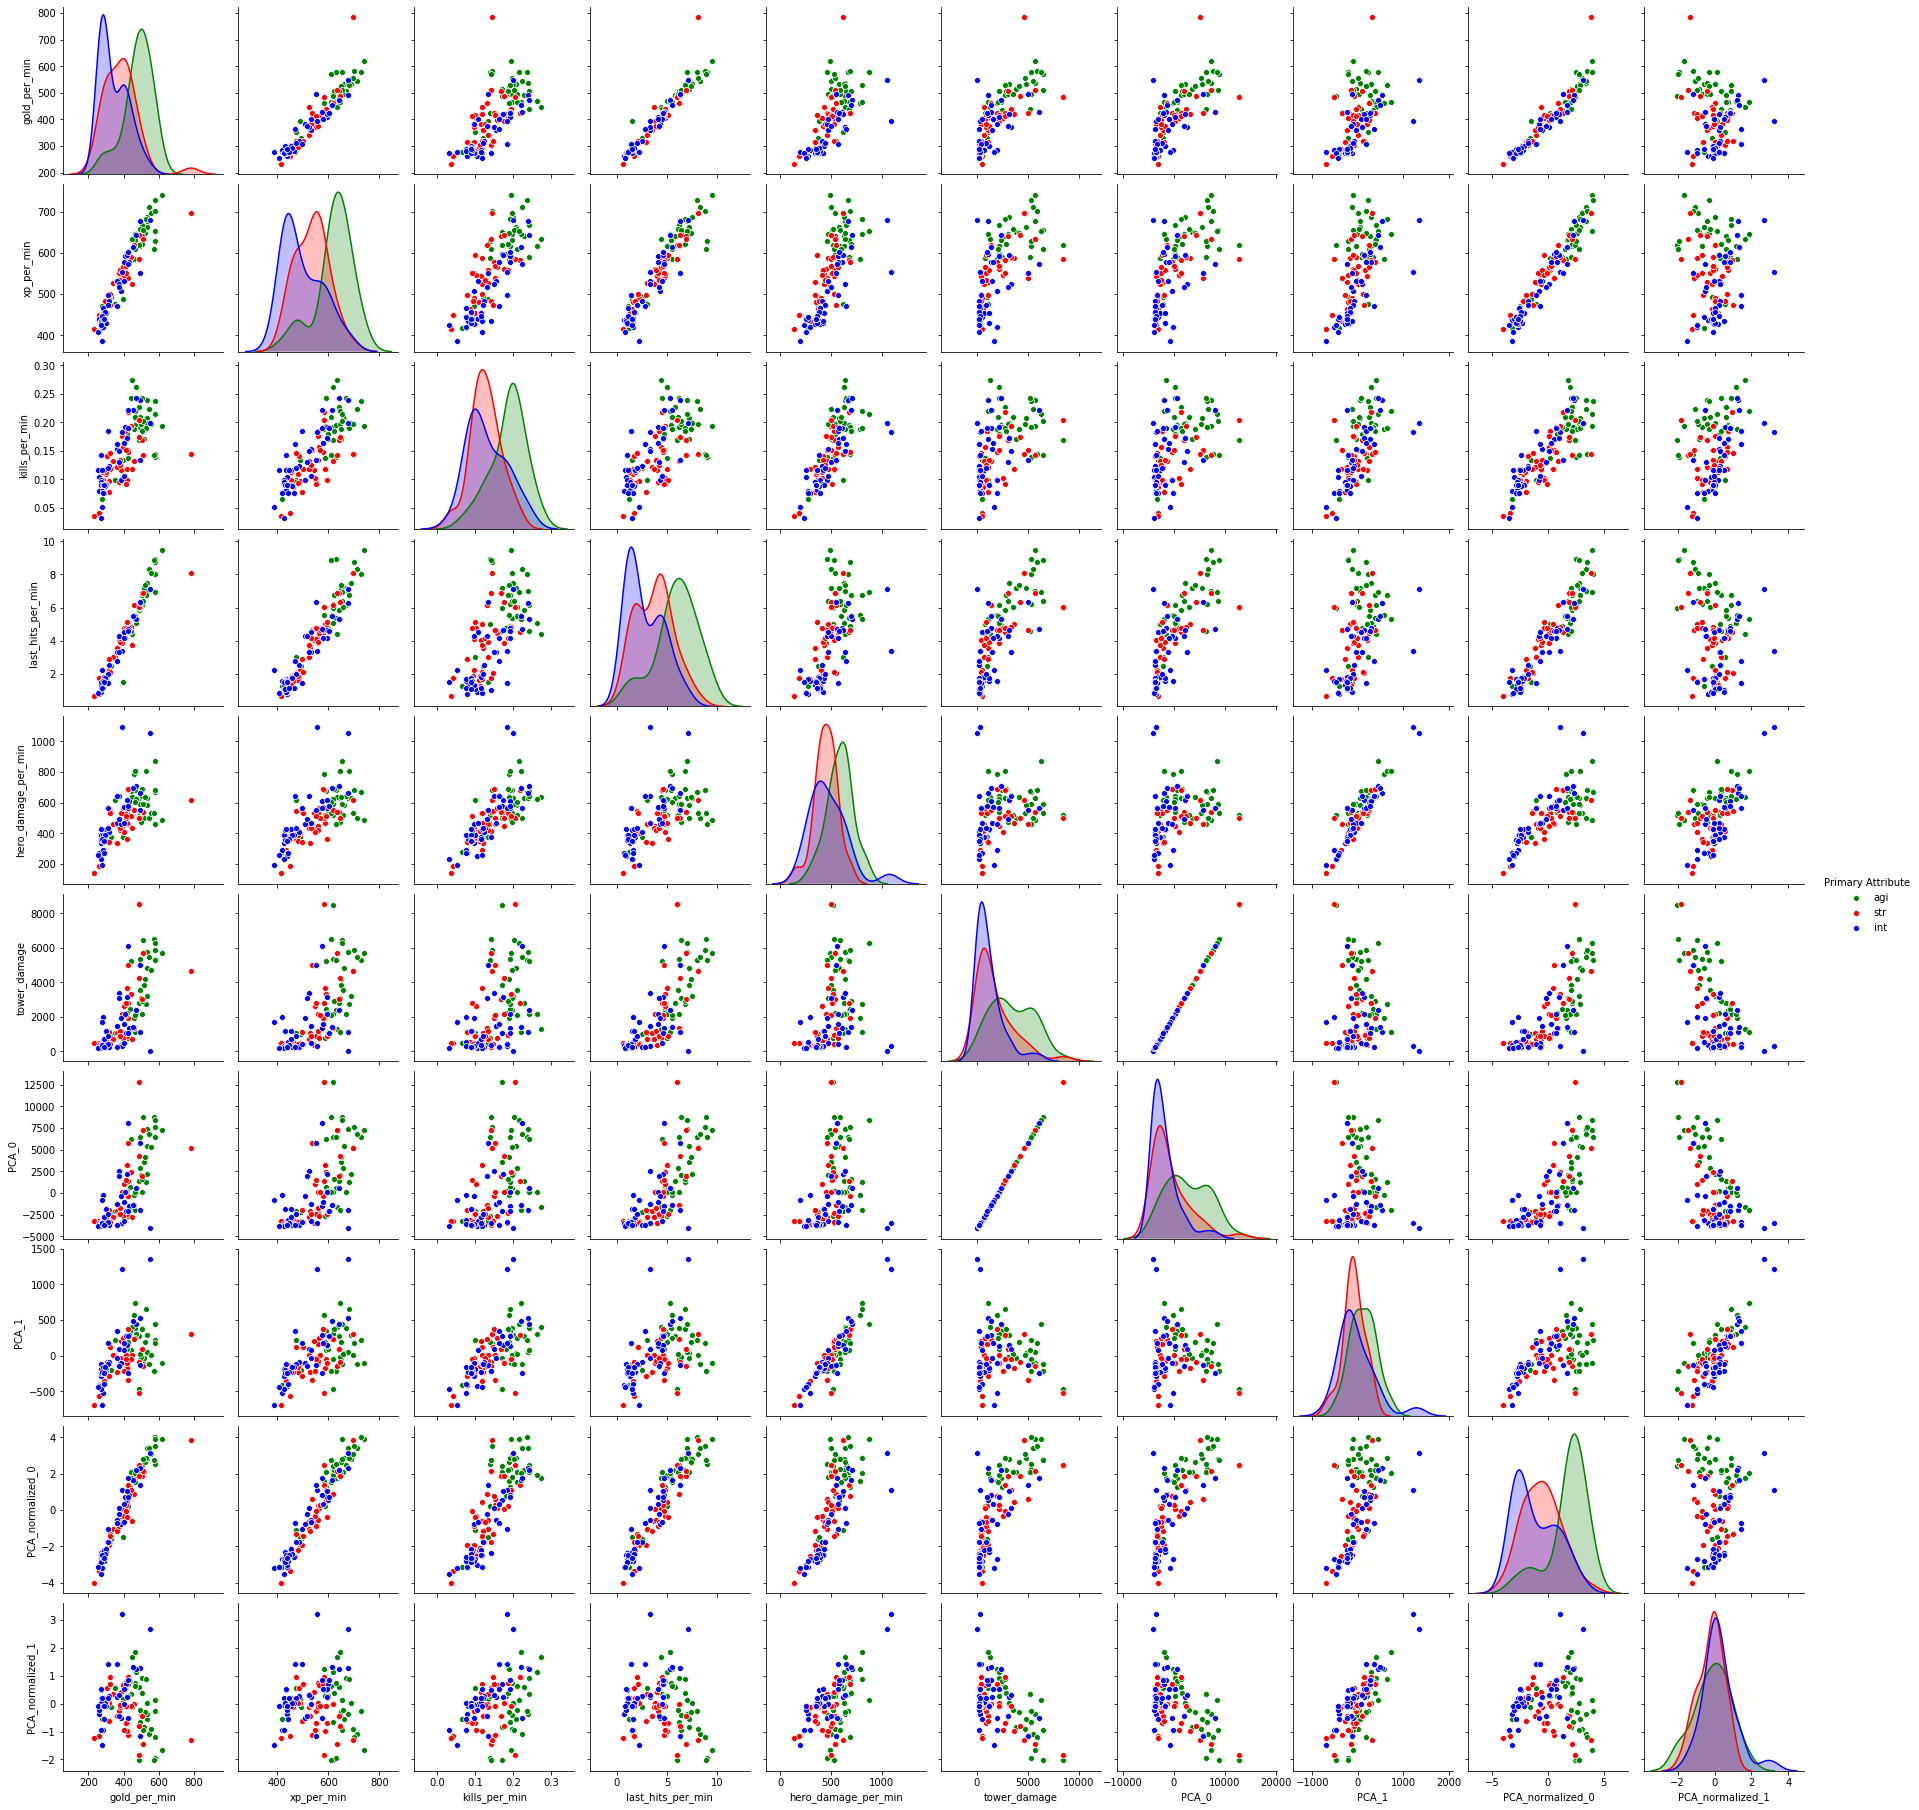

In [84]:
pairplot_data = hero_stats.drop("localized_name", axis=1)
sns.pairplot(pairplot_data, hue="Primary Attribute", 
             palette=["green", "red", "blue"])